# Iris Dataset EDA

Exploratory Data Analysis of the Iris dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
# Check for missing values and data types
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# Statistics by species
df.groupby('species')[iris.feature_names].mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


/tmp/ipykernel_3728/342292085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='Set2')


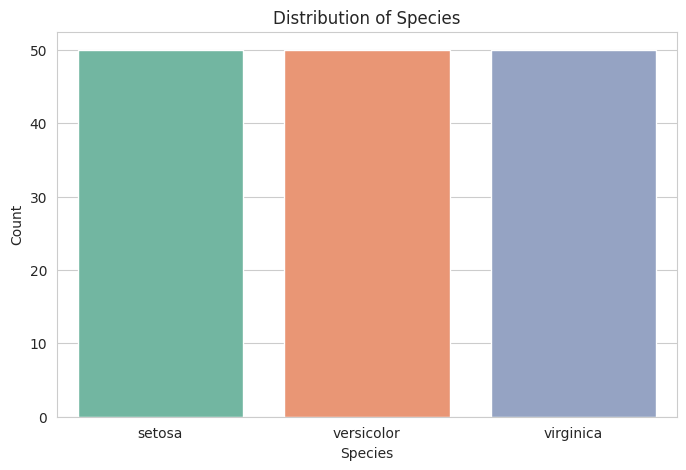

In [14]:
# Count plot - class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species', palette='Set2')
plt.title('Distribution of Species')
plt.ylabel('Count')
plt.xlabel('Species')
plt.show()

In [9]:
df['target'].value_counts()


target
0    50
1    50
2    50
Name: count, dtype: int64

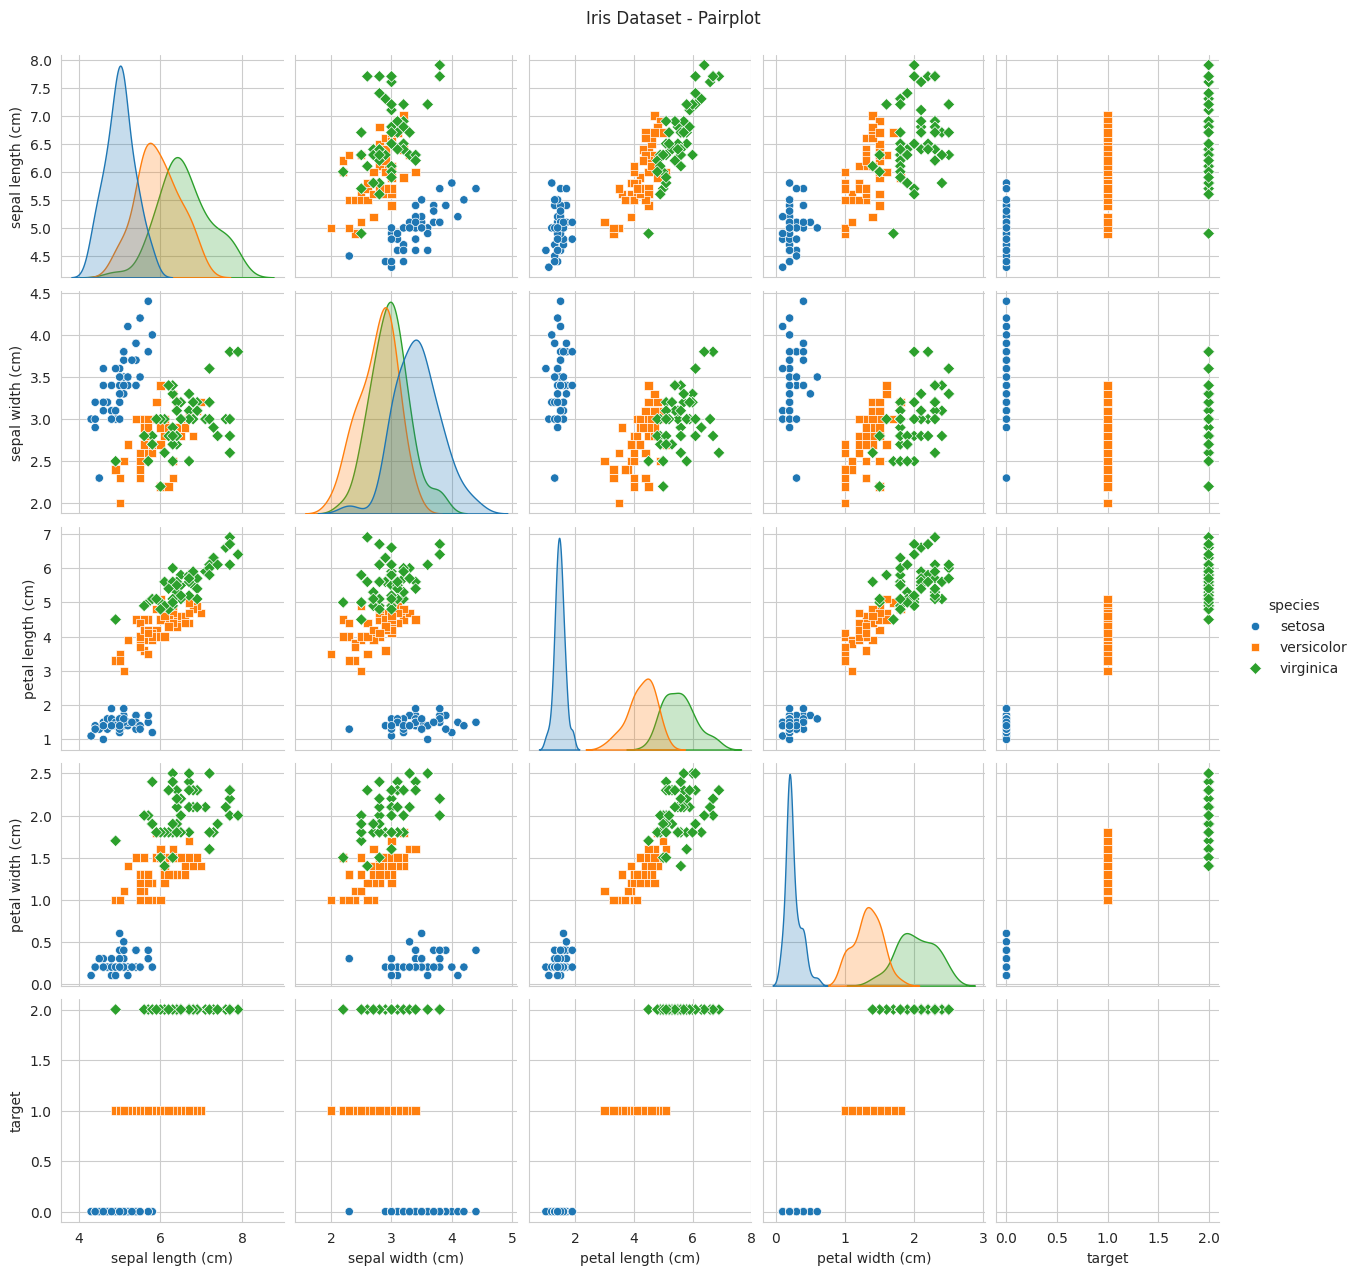

In [4]:
# Pairplot - visualize relationships between features
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Iris Dataset - Pairplot', y=1.02)
plt.show()

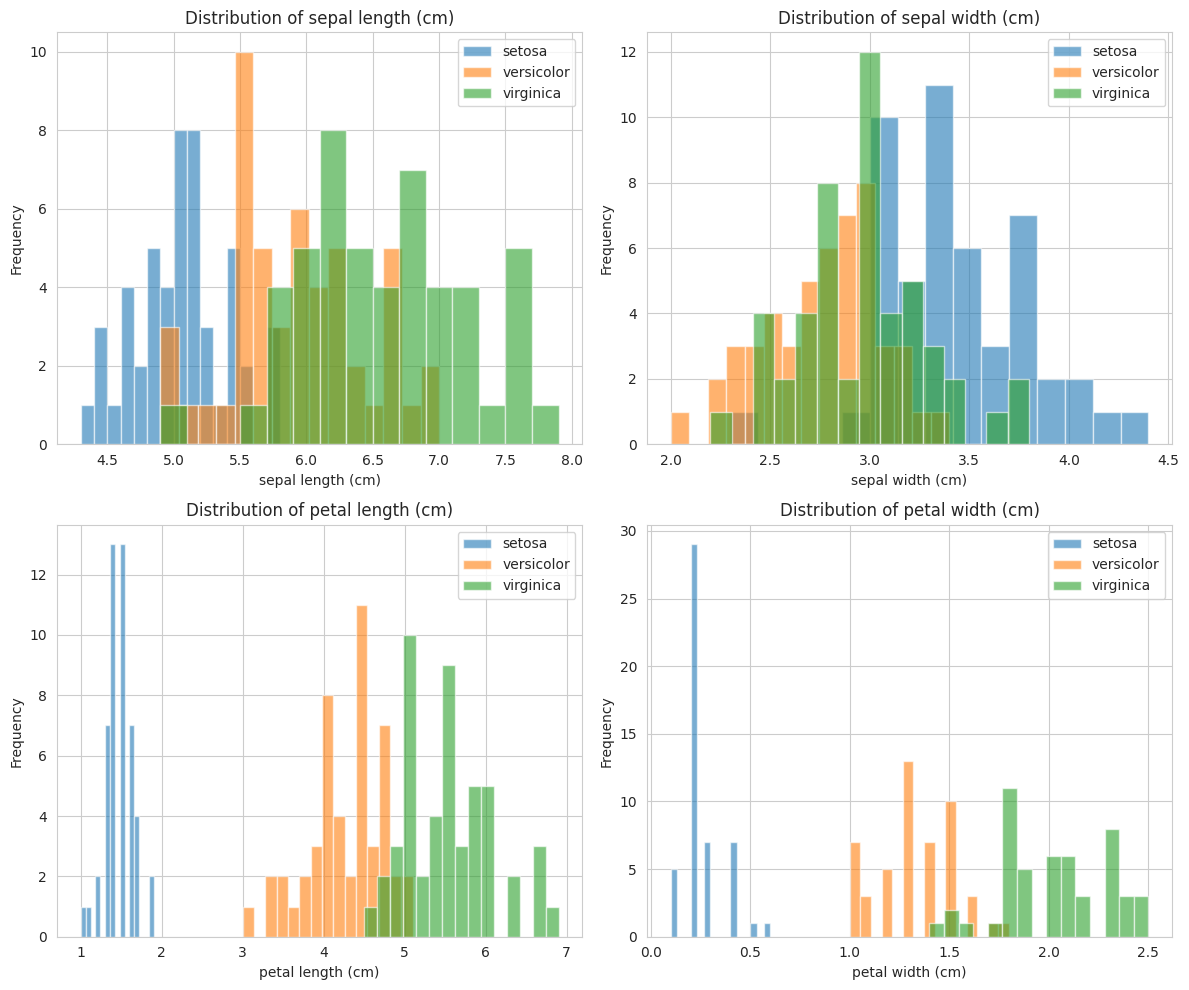

In [10]:
# Distribution of features by species
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = iris.feature_names

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        ax.hist(subset[feature], alpha=0.6, label=species, bins=15)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_3728/59501092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set1', ax=ax)
/tmp/ipykernel_3728/59501092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set1', ax=ax)
/tmp/ipykernel_3728/59501092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set1', ax=ax)
/tmp/ipykernel_3728/59501092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

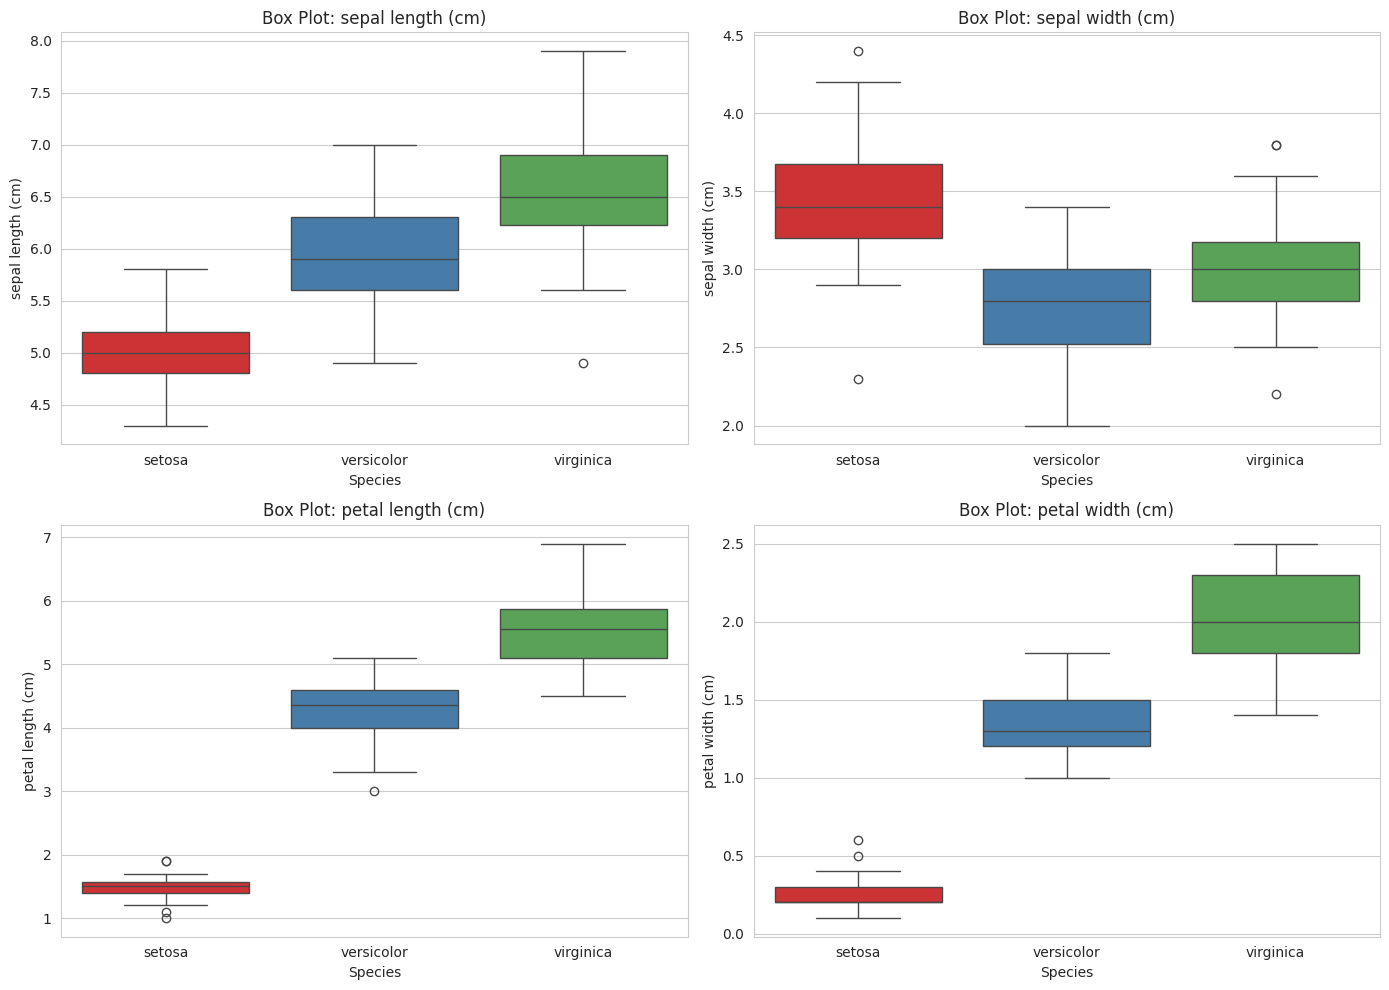

In [15]:
# Box plots - detect outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = iris.feature_names

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(data=df, x='species', y=feature, palette='Set1', ax=ax)
    ax.set_title(f'Box Plot: {feature}')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3728/3184759258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature, palette='muted', ax=ax)
/tmp/ipykernel_3728/3184759258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature, palette='muted', ax=ax)
/tmp/ipykernel_3728/3184759258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y=feature, palette='muted', ax=ax)
/tmp/ipykernel_3728/3184759258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

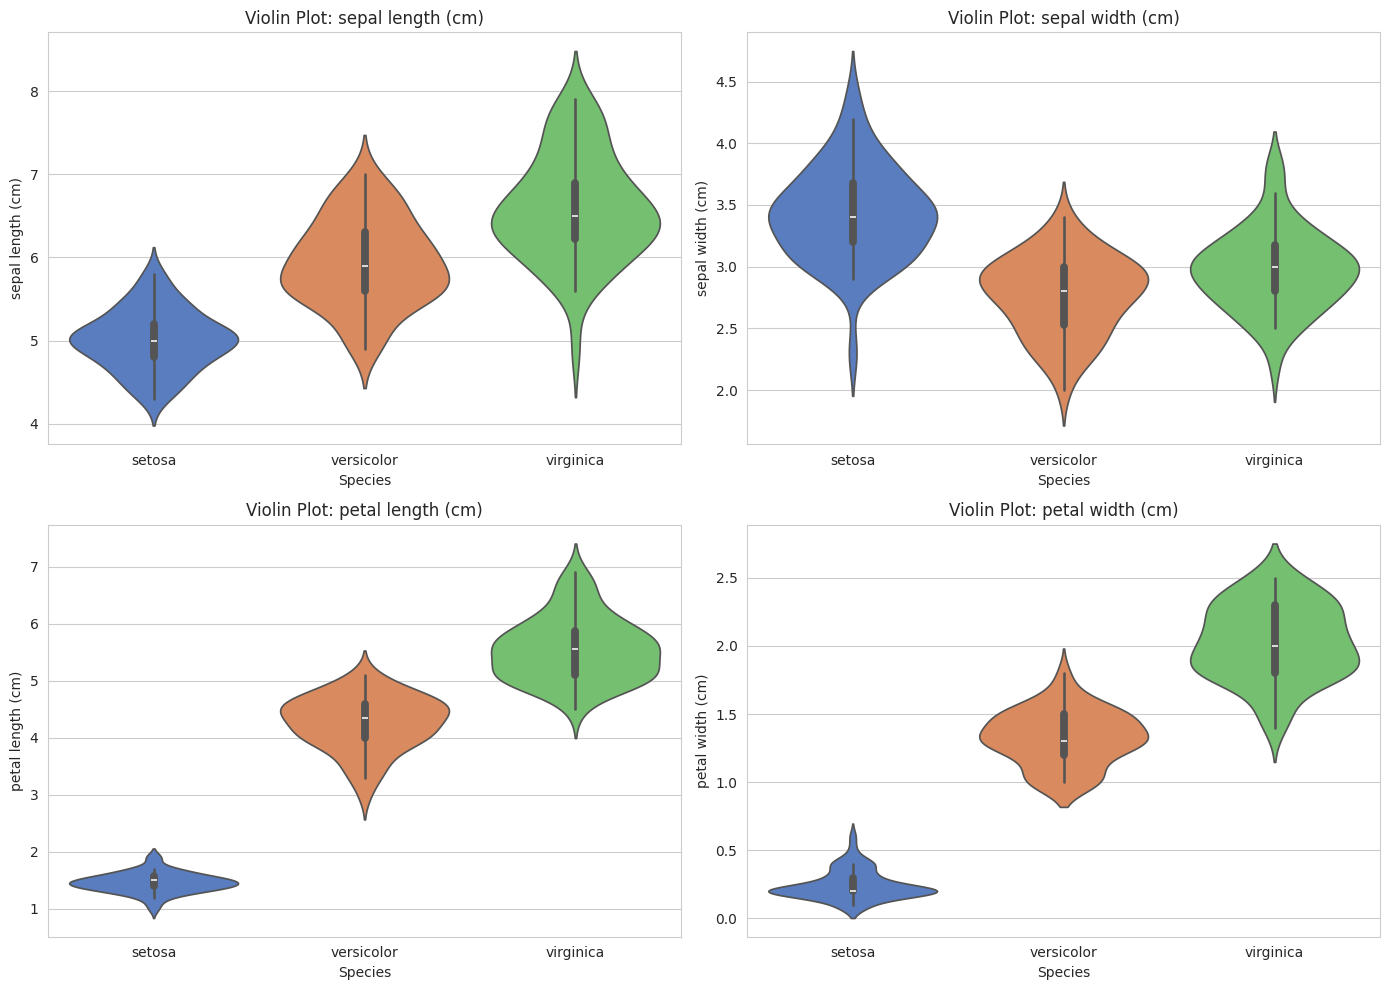

In [16]:
# Violin plots - distribution + density
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = iris.feature_names

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    sns.violinplot(data=df, x='species', y=feature, palette='muted', ax=ax)
    ax.set_title(f'Violin Plot: {feature}')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

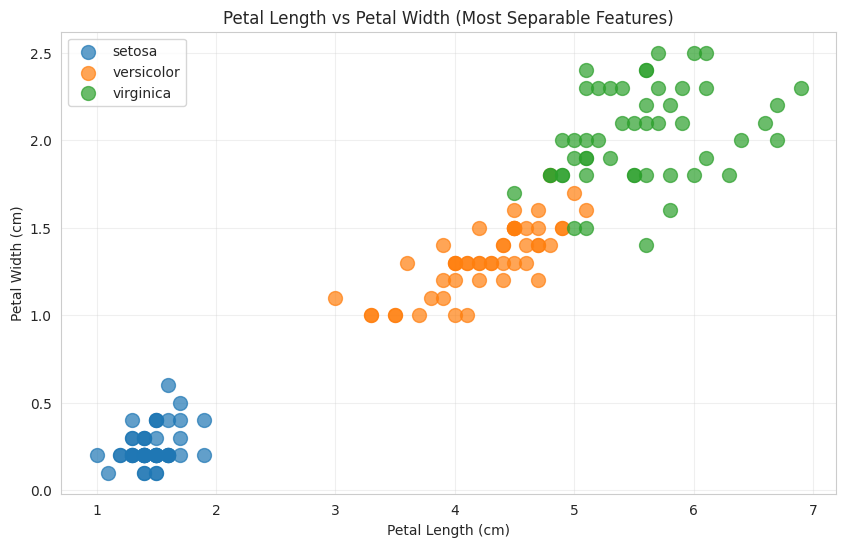

In [17]:
# Scatter plot - most important features
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], 
                label=species, alpha=0.7, s=100)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width (Most Separable Features)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

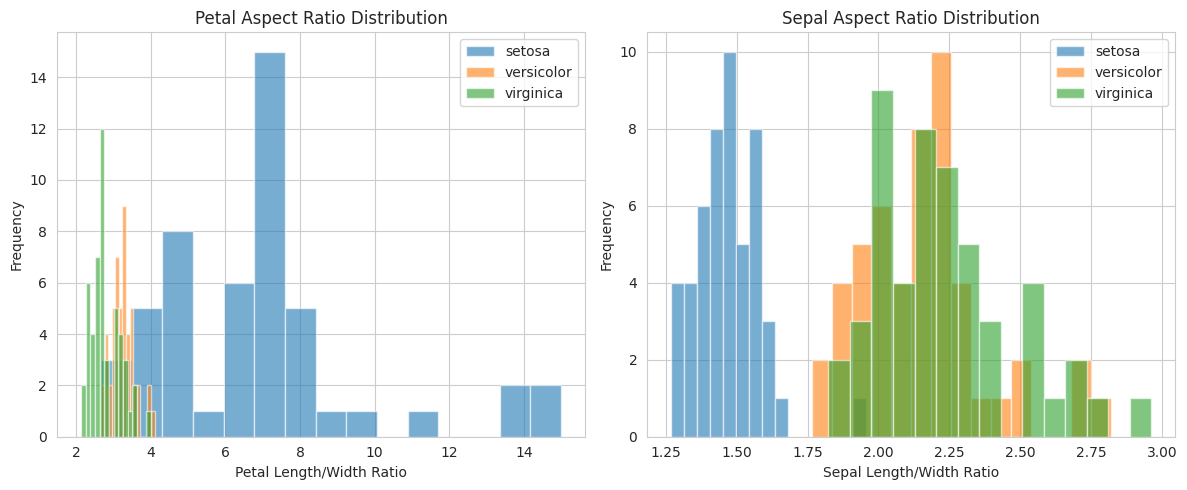

In [40]:
# Feature engineering - creating ratio features
# Import the function
from src.utils import engineer_iris_features

# Apply feature engineering
df = engineer_iris_features(df)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['petal_ratio'], alpha=0.6, label=species, bins=15)
plt.xlabel('Petal Length/Width Ratio')
plt.ylabel('Frequency')
plt.title('Petal Aspect Ratio Distribution')
plt.legend()

plt.subplot(1, 2, 2)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['sepal_ratio'], alpha=0.6, label=species, bins=15)
plt.xlabel('Sepal Length/Width Ratio')
plt.ylabel('Frequency')
plt.title('Sepal Aspect Ratio Distribution')
plt.legend()

plt.tight_layout()
plt.show()

## Classification Metrics

Understanding metrics for balanced and imbalanced datasets

In [19]:
# Import metrics and model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split

# Prepare data (using original balanced Iris)
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a simple model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Model trained on balanced dataset")

Model trained on balanced dataset


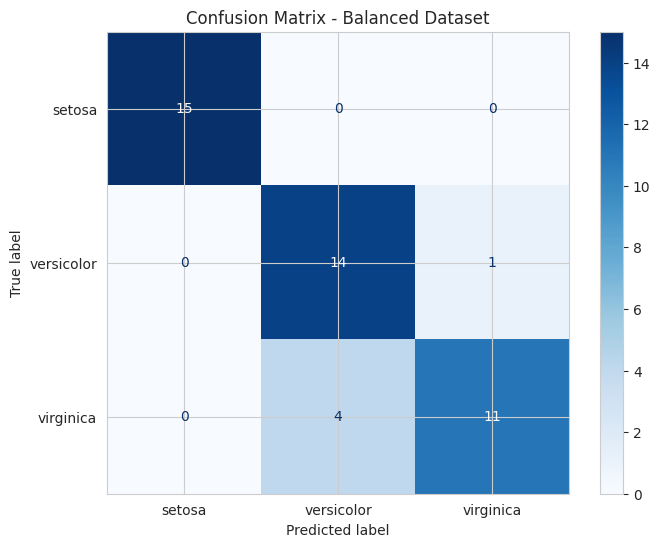


How to read:
- Diagonal = correct predictions
- Off-diagonal = misclassifications
- Row = actual class, Column = predicted class


In [20]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=iris.target_names,
                                        cmap='Blues', ax=ax)
plt.title('Confusion Matrix - Balanced Dataset')
plt.show()

print("\nHow to read:")
print("- Diagonal = correct predictions")
print("- Off-diagonal = misclassifications")
print("- Row = actual class, Column = predicted class")

In [21]:
# Classification Report - Balanced Data
print("Classification Report (Balanced Data):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nMetric definitions:")
print("- Precision: Of predicted positives, how many are correct? (TP / (TP + FP))")
print("- Recall: Of actual positives, how many did we find? (TP / (TP + FN))")
print("- F1-Score: Harmonic mean of precision and recall")
print("- Support: Number of samples in each class")

Classification Report (Balanced Data):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Metric definitions:
- Precision: Of predicted positives, how many are correct? (TP / (TP + FP))
- Recall: Of actual positives, how many did we find? (TP / (TP + FN))
- F1-Score: Harmonic mean of precision and recall
- Support: Number of samples in each class


### Creating Imbalanced Dataset

Let's simulate class imbalance to see how metrics behave

Imbalanced class distribution:
species
setosa        50
versicolor     5
virginica      5
Name: count, dtype: int64

Total samples: 60


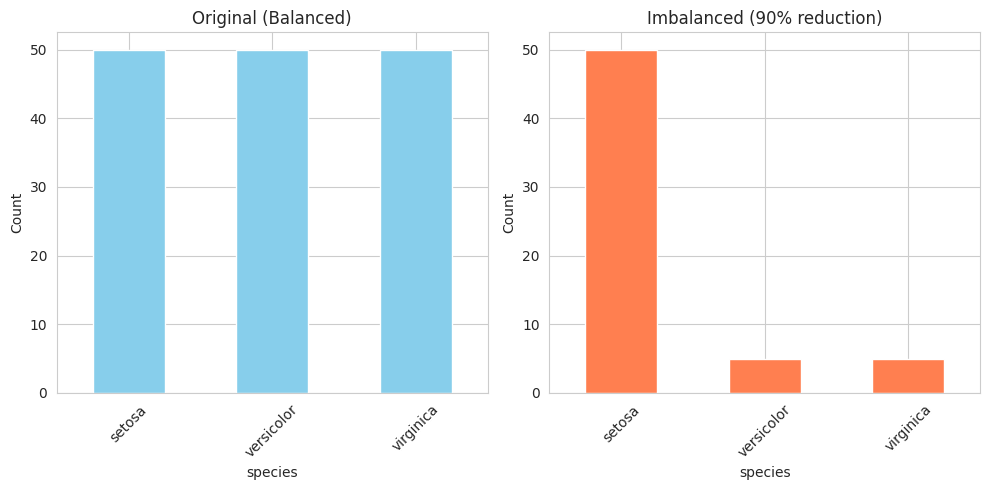

In [22]:
# Create imbalanced dataset: Keep all setosa, reduce versicolor and virginica
df_imbalanced = df.copy()

# Keep only 10% of versicolor and virginica
versicolor_idx = df_imbalanced[df_imbalanced['species'] == 'versicolor'].sample(frac=0.1, random_state=42).index
virginica_idx = df_imbalanced[df_imbalanced['species'] == 'virginica'].sample(frac=0.1, random_state=42).index
setosa_idx = df_imbalanced[df_imbalanced['species'] == 'setosa'].index

df_imbalanced = df_imbalanced.loc[setosa_idx.union(versicolor_idx).union(virginica_idx)]

print("Imbalanced class distribution:")
print(df_imbalanced['species'].value_counts())
print(f"\nTotal samples: {len(df_imbalanced)}")

# Visualize imbalance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['species'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Original (Balanced)')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df_imbalanced['species'].value_counts().plot(kind='bar', color='coral')
plt.title('Imbalanced (90% reduction)')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [33]:
# Train on imbalanced data
X_imb = df_imbalanced[iris.feature_names]
y_imb = df_imbalanced['target']

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.5, random_state=41, stratify=y_imb
)

clf_imb = RandomForestClassifier(n_estimators=100, random_state=42)
clf_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = clf_imb.predict(X_test_imb)

print("Model trained on imbalanced dataset")

Model trained on imbalanced dataset


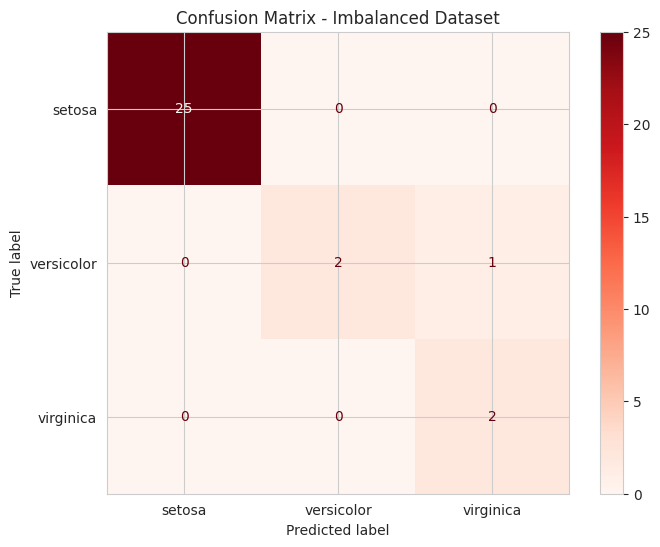


Notice: Minority classes may have more errors!


In [34]:
# Confusion Matrix - Imbalanced
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_imb, y_pred_imb, 
                                        display_labels=iris.target_names,
                                        cmap='Reds', ax=ax)
plt.title('Confusion Matrix - Imbalanced Dataset')
plt.show()

print("\nNotice: Minority classes may have more errors!")

In [35]:
# Compare metrics: Balanced vs Imbalanced
print("="*60)
print("BALANCED DATA:")
print("="*60)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n" + "="*60)
print("IMBALANCED DATA:")
print("="*60)
print(classification_report(y_test_imb, y_pred_imb, target_names=iris.target_names))

print("\n⚠️  Key Observations:")
print("1. Accuracy can be misleading with imbalanced data")
print("2. Look at per-class precision/recall for minority classes")
print("3. Macro avg treats all classes equally")
print("4. Weighted avg accounts for class imbalance")

BALANCED DATA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


IMBALANCED DATA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       1.00      0.67      0.80         3
   virginica       0.67      1.00      0.80         2

    accuracy                           0.97        30
   macro avg       0.89      0.89      0.87        30
weighted avg       0.98      0.97      0.97        30


⚠️  Key Observations:
1. Accuracy can be misleading with imbalanced data
2. Look at per-class precision/recall for minority classes
3. Macro avg treats all classes equally
4. Weighted avg accounts for cla

### Precision vs Recall Trade-off

Understanding the trade-off for imbalanced classes

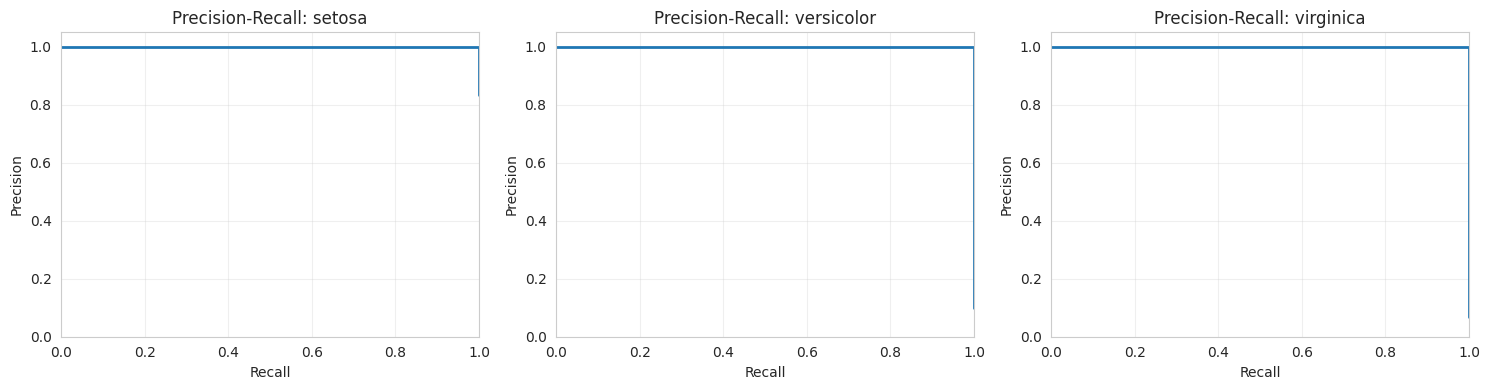

Interpretation:
- Top-right corner is ideal (high precision AND recall)
- Curve closer to top-right = better model
- Important for imbalanced classes!


In [36]:
# Precision-Recall curves for each class (using imbalanced data)
y_score_imb = clf_imb.predict_proba(X_test_imb)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, class_name in enumerate(iris.target_names):
    # Binary classification: class i vs rest
    y_true_binary = (y_test_imb == i).astype(int)
    y_score_class = y_score_imb[:, i]
    
    precision, recall, _ = precision_recall_curve(y_true_binary, y_score_class)
    
    axes[i].plot(recall, precision, linewidth=2)
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'Precision-Recall: {class_name}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Top-right corner is ideal (high precision AND recall)")
print("- Curve closer to top-right = better model")
print("- Important for imbalanced classes!")

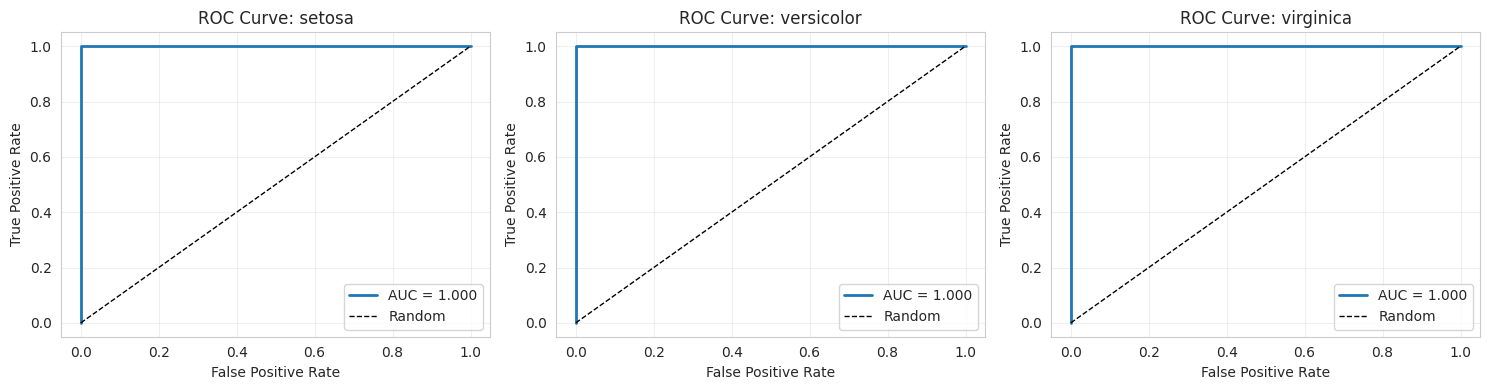

ROC-AUC Interpretation:
- AUC = 1.0: Perfect classifier
- AUC = 0.5: Random guessing
- Good for balanced classes, can be misleading for imbalanced!


In [37]:
# ROC Curves for each class

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, class_name in enumerate(iris.target_names):
    y_true_binary = (y_test_imb == i).astype(int)
    y_score_class = y_score_imb[:, i]
    
    fpr, tpr, _ = roc_curve(y_true_binary, y_score_class)
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.3f}')
    axes[i].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve: {class_name}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("ROC-AUC Interpretation:")
print("- AUC = 1.0: Perfect classifier")
print("- AUC = 0.5: Random guessing")
print("- Good for balanced classes, can be misleading for imbalanced!")

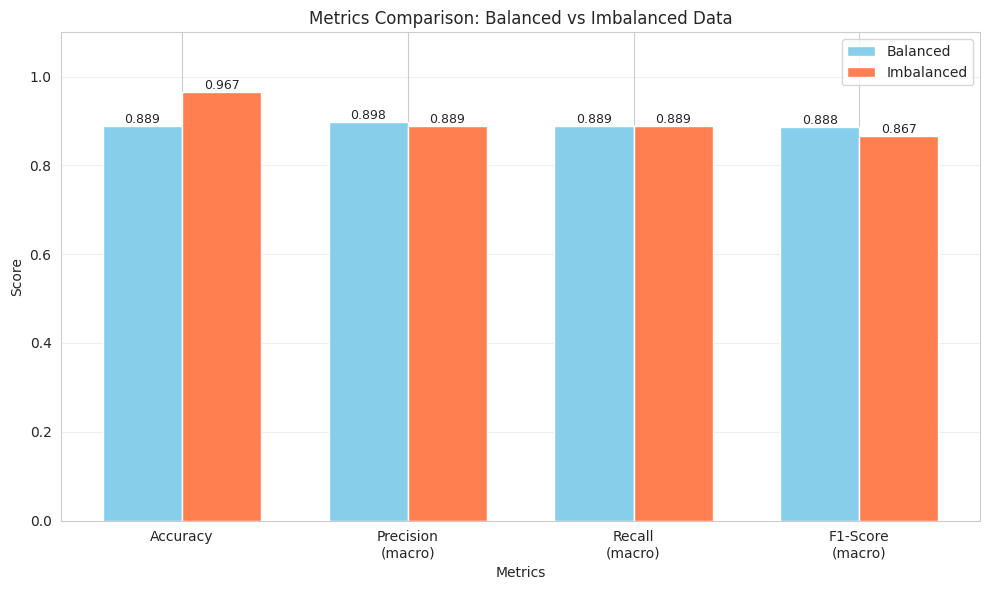


🎯 Key Takeaway:
For imbalanced data, use F1-score, precision, and recall over accuracy!


In [38]:
# Metric comparison visualization
metrics_balanced = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision\n(macro)': precision_score(y_test, y_pred, average='macro'),
    'Recall\n(macro)': recall_score(y_test, y_pred, average='macro'),
    'F1-Score\n(macro)': f1_score(y_test, y_pred, average='macro')
}

metrics_imbalanced = {
    'Accuracy': accuracy_score(y_test_imb, y_pred_imb),
    'Precision\n(macro)': precision_score(y_test_imb, y_pred_imb, average='macro'),
    'Recall\n(macro)': recall_score(y_test_imb, y_pred_imb, average='macro'),
    'F1-Score\n(macro)': f1_score(y_test_imb, y_pred_imb, average='macro')
}

x = np.arange(len(metrics_balanced))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_balanced.values(), width, label='Balanced', color='skyblue')
bars2 = ax.bar(x + width/2, metrics_imbalanced.values(), width, label='Imbalanced', color='coral')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Metrics Comparison: Balanced vs Imbalanced Data')
ax.set_xticks(x)
ax.set_xticklabels(metrics_balanced.keys())
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n🎯 Key Takeaway:")
print("For imbalanced data, use F1-score, precision, and recall over accuracy!")

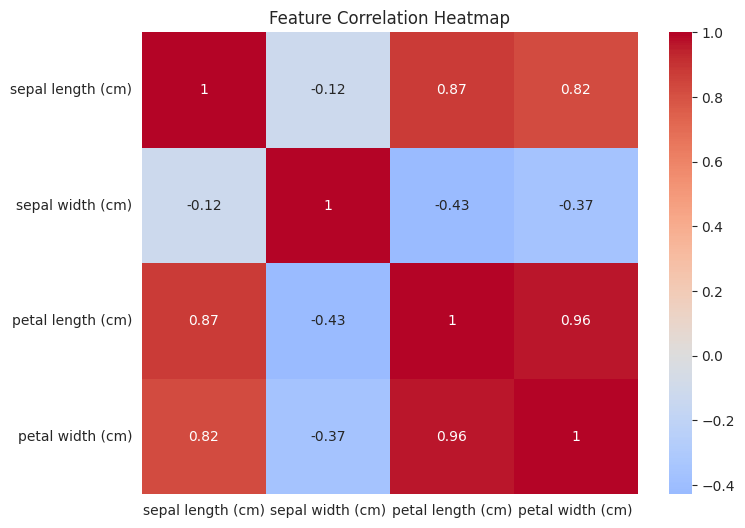

In [39]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()